## EDA - Reviews and Ratings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#found code solution from stackoverflow: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/kchien_data/

df = pd.read_csv('clean_review_and_scores.csv')

Mounted at /content/drive
/content/drive/My Drive/kchien_data


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,language,word_count
0,2595,17857.0,2009-11-21,50679.0,Jean,Notre séjour de trois nuits. Nous avons appréc...,4.7,4.72,4.62,4.76,4.79,4.86,4.41,fr,130.0
1,2595,19176.0,2009-12-05,53267.0,Cate,Great experience.,4.7,4.72,4.62,4.76,4.79,4.86,4.41,ro,2.0
2,2595,19760.0,2009-12-10,38960.0,Anita,I ve stayed with my friend at the Midtown Cast...,4.7,4.72,4.62,4.76,4.79,4.86,4.41,en,93.0
3,2595,34320.0,2010-04-09,71130.0,Kai-Uwe,"We ve been staying here for about 9 nights, en...",4.7,4.72,4.62,4.76,4.79,4.86,4.41,en,67.0
4,2595,46312.0,2010-05-25,117113.0,Alicia,We had a wonderful stay at Jennifer s charming...,4.7,4.72,4.62,4.76,4.79,4.86,4.41,en,25.0
5,2595,1238204.0,2012-05-07,1783688.0,Sergey,Hi to everyone! Would say our greatest complim...,4.7,4.72,4.62,4.76,4.79,4.86,4.41,en,99.0
6,2595,1293632.0,2012-05-17,1870771.0,Loïc,"Jennifer was very friendly and helpful, and he...",4.7,4.72,4.62,4.76,4.79,4.86,4.41,en,37.0
7,2595,2022498.0,2012-08-18,2124102.0,Melanie,This apartment is like a real castle old and u...,4.7,4.72,4.62,4.76,4.79,4.86,4.41,en,217.0
8,2595,4682989.0,2013-05-20,496053.0,Eric,Jennifer s place was in a great midtown locati...,4.7,4.72,4.62,4.76,4.79,4.86,4.41,en,59.0
9,2595,13193832.0,2014-05-21,13685934.0,Gerald,Jennifer is a very nice host. Everything is cl...,4.7,4.72,4.62,4.76,4.79,4.86,4.41,en,25.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891074 entries, 0 to 891073
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   891074 non-null  object 
 1   id                           891074 non-null  float64
 2   date                         891074 non-null  object 
 3   reviewer_id                  891074 non-null  float64
 4   reviewer_name                891074 non-null  object 
 5   comments                     891074 non-null  object 
 6   review_scores_rating         890324 non-null  float64
 7   review_scores_accuracy       890324 non-null  float64
 8   review_scores_cleanliness    890324 non-null  object 
 9   review_scores_checkin        890324 non-null  float64
 10  review_scores_communication  890322 non-null  float64
 11  review_scores_location       890322 non-null  float64
 12  review_scores_value          890322 non-null  float64
 13 

In [5]:
df.isna().sum()

listing_id                       0
id                               0
date                             0
reviewer_id                      0
reviewer_name                    0
comments                         0
review_scores_rating           750
review_scores_accuracy         750
review_scores_cleanliness      750
review_scores_checkin          750
review_scores_communication    752
review_scores_location         752
review_scores_value            752
language                         4
word_count                       4
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].astype(float)

## Ratings EDA

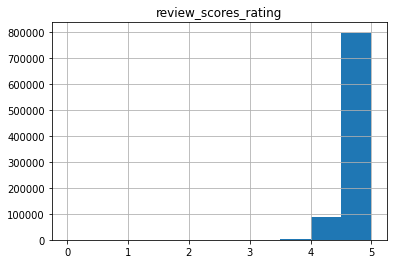

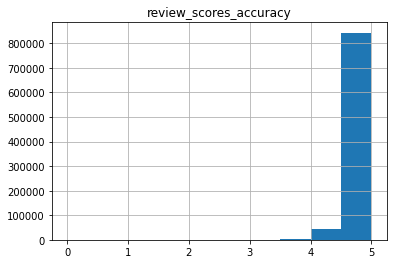

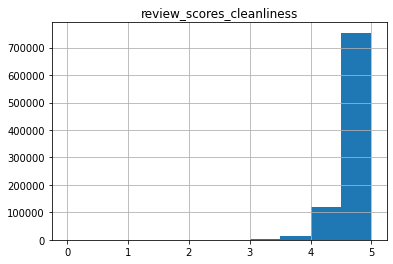

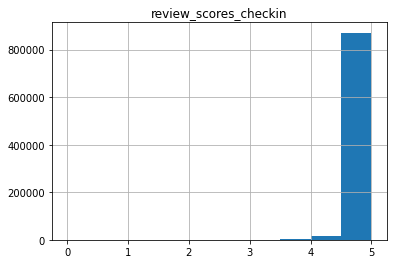

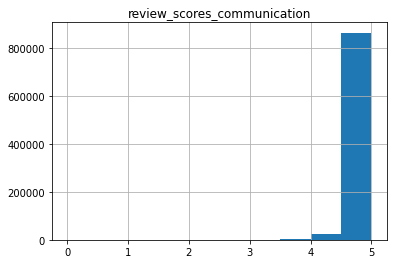

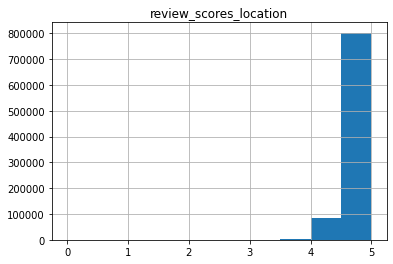

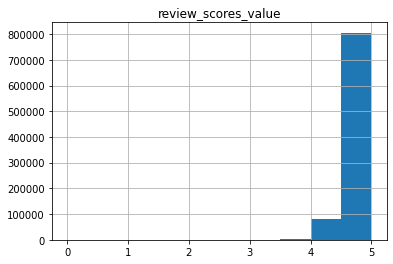

In [8]:
#check distribution of ratings

review_scores = list(df.filter(regex='review_scores_').columns)

for x in review_scores:
    df[x].hist()
    plt.title(x)
    plt.show()

* Uneven distribution of ratings -- looks like most AirBnB listings are higher rather than lower
* Will need to account for imbalanced classes in model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


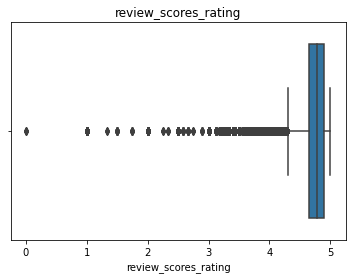

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


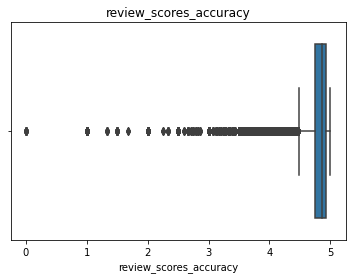

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


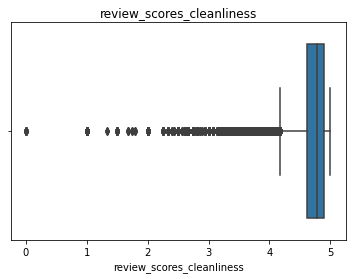

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


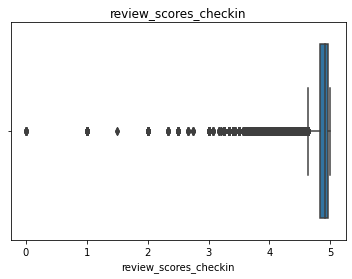

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


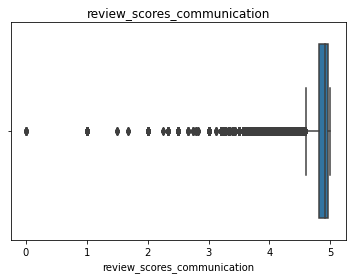

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


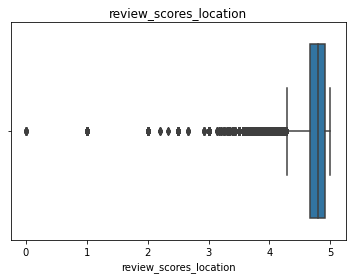

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


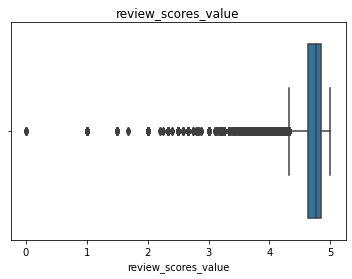

In [9]:
#check what are outliers

for x in review_scores:
    sns.boxplot(df[x])
    plt.title(x)
    plt.show()

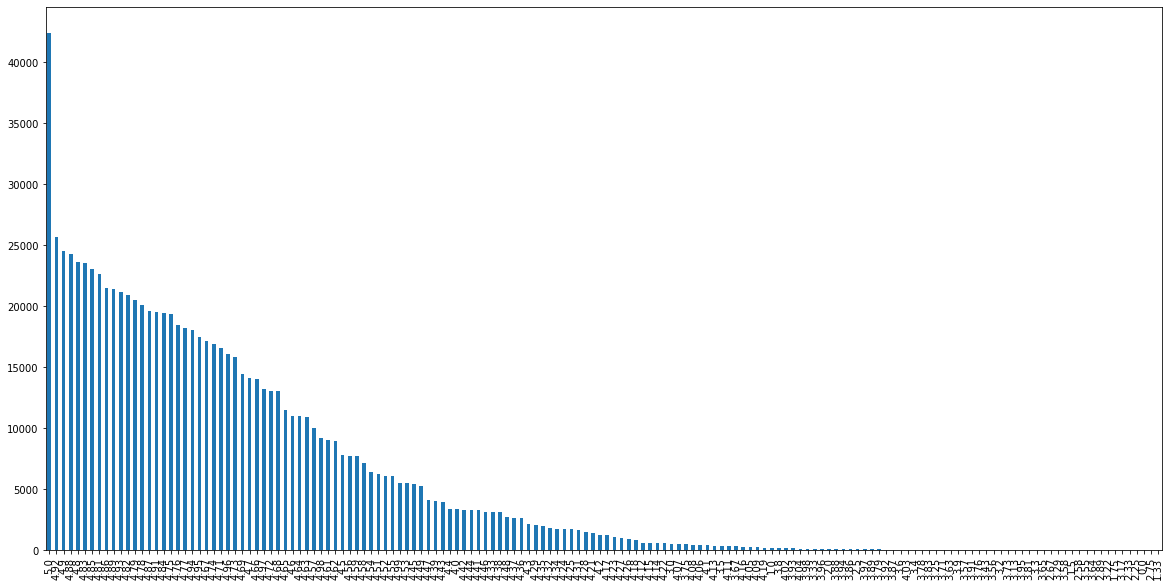

In [10]:
#checking count of how many unique values

df['review_scores_rating'].value_counts().plot.bar(figsize=(20,10))

## Word Count EDA

In [11]:
#check average word count for comments

df['word_count'].describe()

count    890322.000000
mean         47.840190
std          50.987588
min           1.000000
25%          15.000000
50%          34.000000
75%          63.000000
max        1041.000000
Name: word_count, dtype: float64

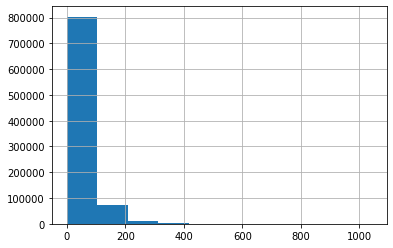

In [12]:
df['word_count'].hist()

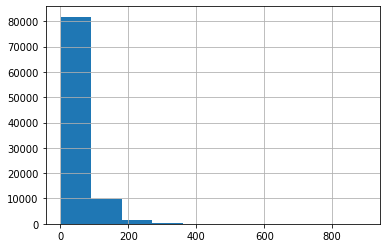

In [13]:
#check average word count for non-english comments

nonenglish = df[~df['language'].isin(['en'])]
nonenglish['word_count'].hist()

In [14]:
nonenglish['word_count'].describe()

count    93851.000000
mean        42.823859
std         50.607784
min          1.000000
25%          5.000000
50%         29.000000
75%         61.000000
max        897.000000
Name: word_count, dtype: float64

In [15]:
nonenglish[nonenglish['word_count'] < 7]

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,language,word_count
1,2595,1.917600e+04,2009-12-05,53267.0,Cate,Great experience.,4.70,4.72,4.62,4.76,4.79,4.86,4.41,ro,2.0
43,2595,4.498159e+08,2019-05-07,168460710.0,Christopher,10 / 10 would stay again,4.70,4.72,4.62,4.76,4.79,4.86,4.41,tl,6.0
220,3831,2.311006e+08,2018-01-30,45150770.0,Kazue,家の近くにﾊﾞｽが色々通っていて､地下鉄駅からも近いです。水周りも綺麗で､旅行中でも朝食や夕...,4.45,4.58,4.49,4.78,4.80,4.71,4.64,ja,1.0
250,3831,2.891158e+08,2018-07-11,130956729.0,Carlos,Muy buen lugar!,4.45,4.58,4.49,4.78,4.80,4.71,4.64,es,3.0
271,3831,3.599348e+08,2018-12-18,22889557.0,Kyle,As described,4.45,4.58,4.49,4.78,4.80,4.71,4.64,es,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890931,53317234,5.057507e+17,2021-11-28,228942946.0,Liniuzka,Amables limpios céntricos increíbles,5.00,5.00,5.00,5.00,5.00,5.00,5.00,es,4.0
890938,53321762,5.006659e+17,2021-11-21,432379452.0,Naeshawn,Amazing,5.00,5.00,5.00,4.83,5.00,5.00,5.00,sw,1.0
891041,53489130,5.034761e+17,2021-11-25,94541631.0,Mir,Dont book,1.00,1.00,1.00,1.00,1.00,1.00,1.00,af,2.0
891048,53506855,5.050490e+17,2021-11-27,145811451.0,凡哲,Cool guy,4.50,4.50,4.50,5.00,3.50,4.50,5.00,so,2.0


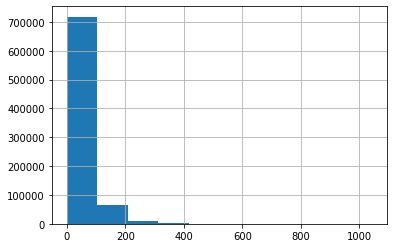

In [16]:
#check word count for english reviews

english = df[df['language'] == 'en']
english['word_count'].hist()

In [17]:
english['word_count'].describe()

count    796471.000000
mean         48.431282
std          50.999703
min           1.000000
25%          16.000000
50%          34.000000
75%          63.000000
max        1041.000000
Name: word_count, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


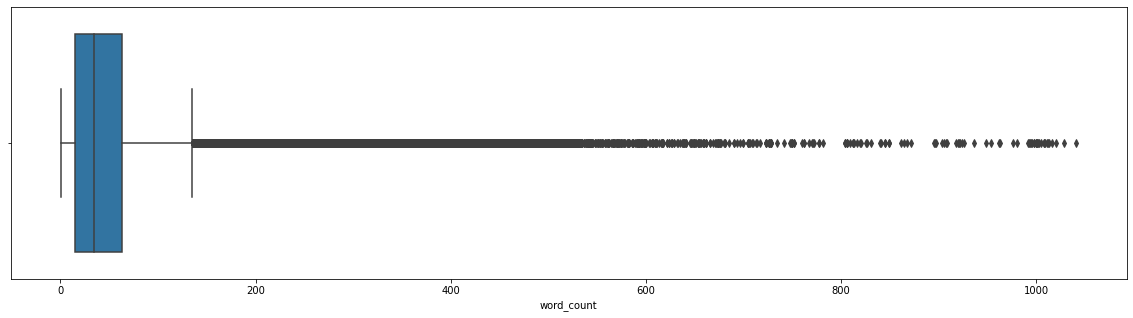

In [18]:
#check outliers for word count
plt.figure(figsize=(20,5))
sns.boxplot(df['word_count'])

In [19]:
#created new dataframe for only english reviews that have 15 or more words in review

df2 = df[(df['word_count'] > 15) & (df['language'] == 'en')]

In [20]:
df2.describe()

,id,reviewer_id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,word_count
count,6.023940e+05,6.023940e+05,602394.000000,602394.000000,602394.000000,602394.000000,602394.000000,602394.000000,602394.000000,602394.000000
mean,6.096712e+16,9.786951e+07,4.755750,4.820700,4.728670,4.878059,4.876826,4.763602,4.731235,61.203261
std,1.543988e+17,1.028912e+08,0.211628,0.188526,0.261805,0.153235,0.165521,0.206491,0.199571,52.576910
min,1.743000e+03,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,1.605538e+08,1.804919e+07,4.670000,4.760000,4.630000,4.830000,4.840000,4.660000,4.650000,29.000000
50%,4.002619e+08,5.837822e+07,4.800000,4.870000,4.800000,4.920000,4.920000,4.810000,4.770000,46.000000
75%,6.180647e+08,1.487935e+08,4.900000,4.940000,4.910000,4.970000,4.970000,4.920000,4.850000,75.000000
max,5.108137e+17,4.345759e+08,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1041.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


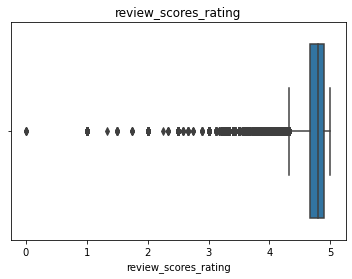

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


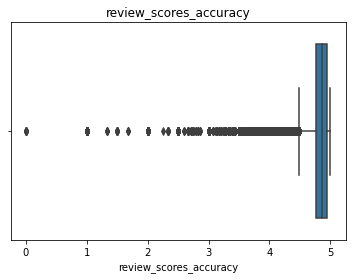

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


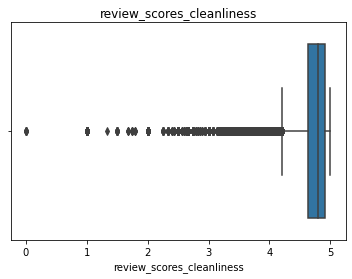

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


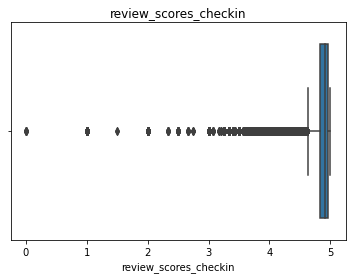

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


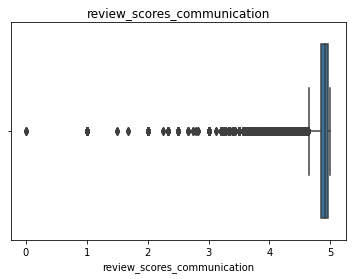

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


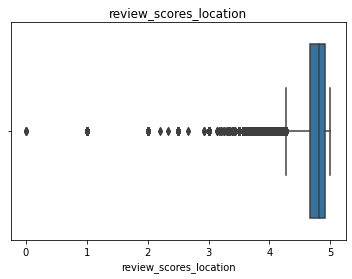

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


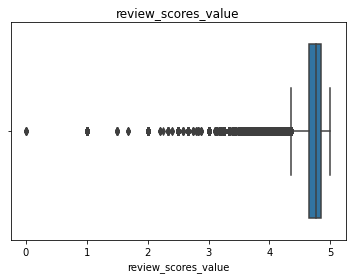

In [21]:
#check outlier scores for new dataframe

for x in review_scores:
    sns.boxplot(df2[x])
    plt.title(x)
    plt.show()

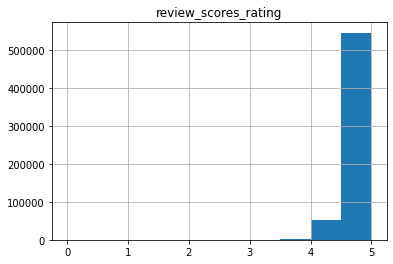

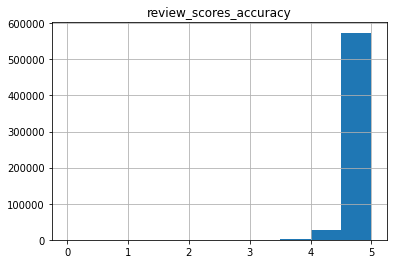

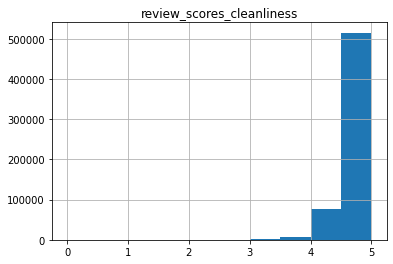

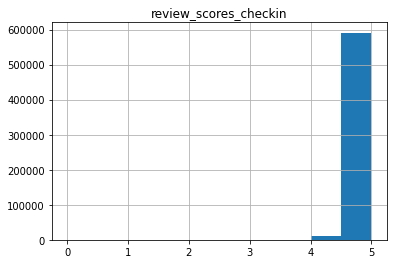

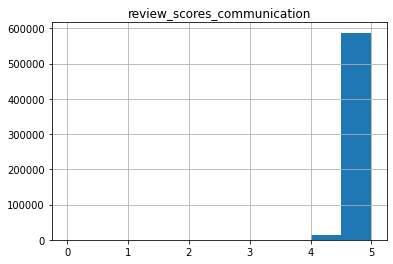

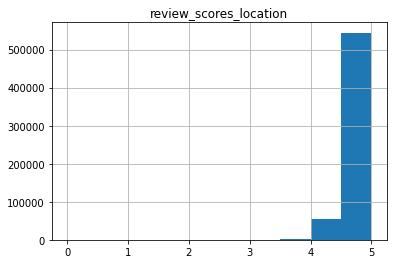

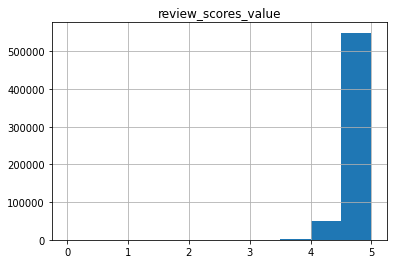

In [22]:
#check distribution of scores for new dataframe

for x in review_scores:
    df2[x].hist()
    plt.title(x)
    plt.show()

In [23]:
#check average and median scores based on overall review buckets

b = [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
l = [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
df2['overall_score_bin'] = pd.cut(df2['review_scores_rating'], bins = b, labels=l, right=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


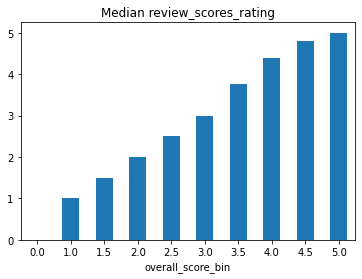

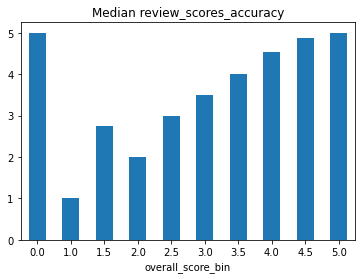

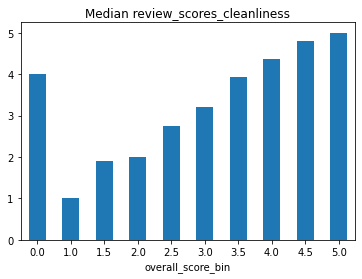

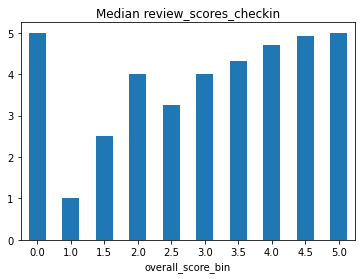

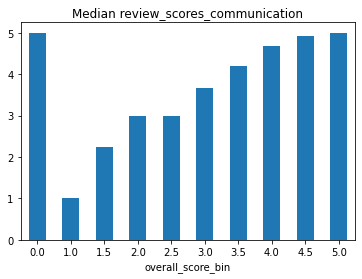

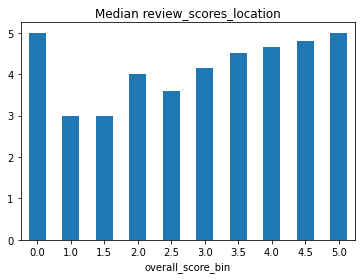

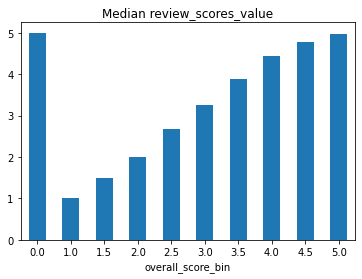

In [24]:
#check median scores by overall score category

for x in review_scores:
    df2.groupby(['overall_score_bin'])[x].median().plot.bar(rot=0, title='Median {}'.format(x))
    plt.show()

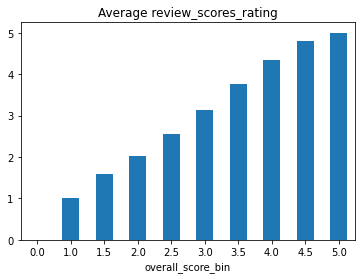

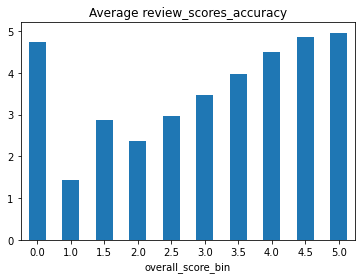

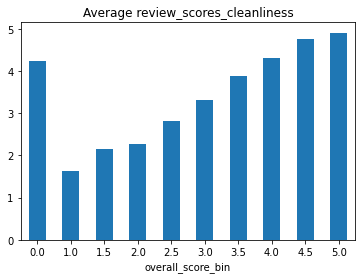

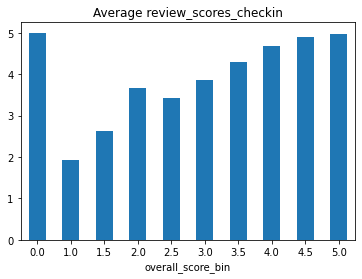

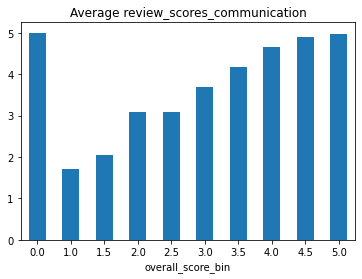

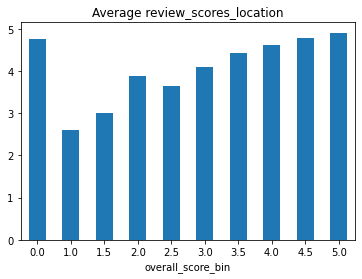

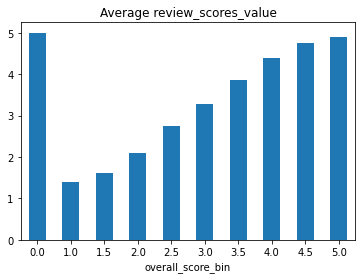

In [25]:
#check mean scores by overall score category

for x in review_scores:
    df2.groupby(['overall_score_bin'])[x].mean().plot.bar(rot=0, title='Average {}'.format(x))
    plt.show()

In [26]:
#noted there are mislabels for overall ratings
#host was rated as 0 but appearing as positive reviews in all other areas
#will drop this data error

zeros = df2[df2['overall_score_bin'] == 0]

pd.options.display.max_colwidth = int(zeros['comments'].str.len().max()) + 1
print(zeros['comments'])

drop = zeros.index.tolist()
df2.drop(index=drop, inplace=True)

57114                                                                                                                                                                                                                                                                                                               I had a great time staying in Alex s room for 25 days.  The apartment is cute, in a very interesting area, the room itself had everything you needed and the roommates were perfect.  Really nice people that I shared some nice chats with.  All in all, a great experience!
67939                                                                                                                                                                                                                                                                                                                                                                                                                                 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


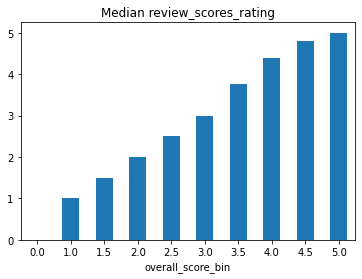

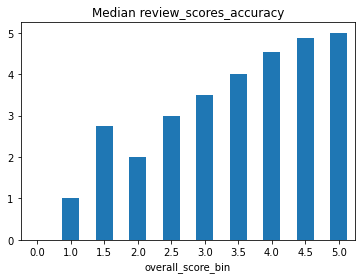

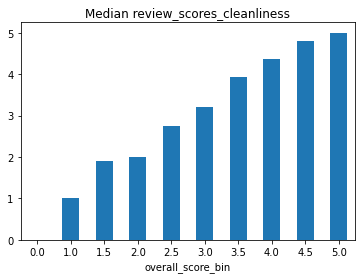

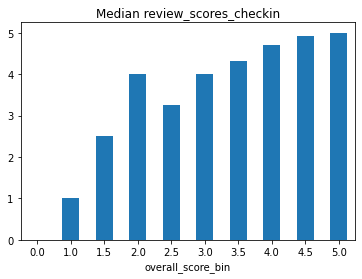

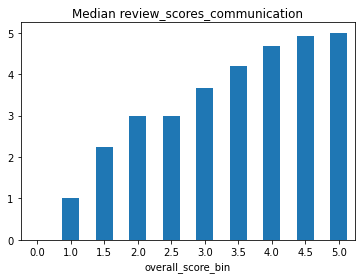

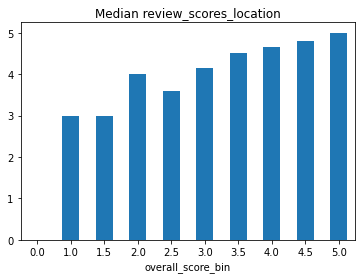

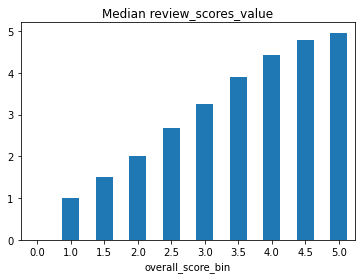

In [27]:
#recheck median and mean scores by overall score bin

for x in review_scores:
    df2.groupby(['overall_score_bin'])[x].median().plot.bar(rot=0, title='Median {}'.format(x))
    plt.show()

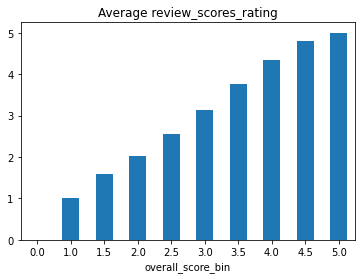

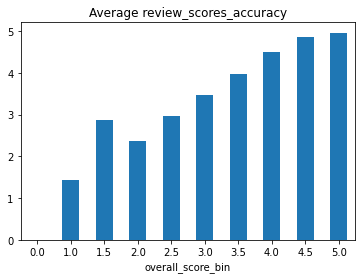

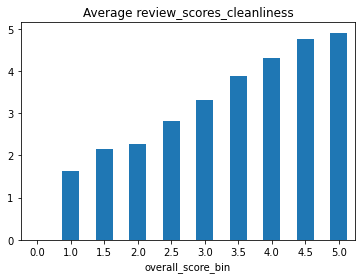

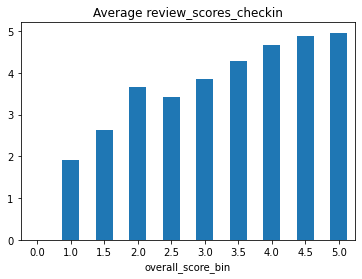

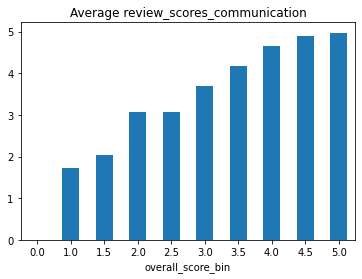

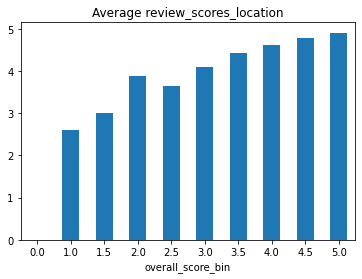

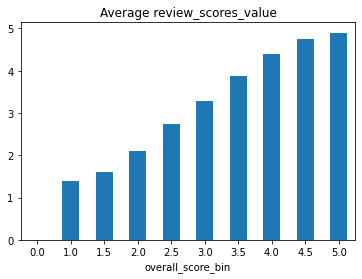

In [28]:
#check mean scores by overall score category

for x in review_scores:
    df2.groupby(['overall_score_bin'])[x].mean().plot.bar(rot=0, title='Average {}'.format(x))
    plt.show()